<a href="https://www.kaggle.com/code/faris71/neural-network-from-scratch?scriptVersionId=242758539" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sketch for the final GOAL



1.   Import the MNIST dataset
2.   Manage it.
3.   Divide it to 2 parts for training and testing.
4.   Initialize the values for X, W, and b\
5.   Then create functions for ReLU, softmax, forward prop
6.   Create the function for backprop, derivative of ReLU.
7.   Create the function for gradient decent, predictions and accuracy.



# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Dowloading the dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-in-csv


# Turning the csv into readable data frame

In [3]:
df = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")

# Reading the data frame

In [4]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Observing the shape of the data (i.e. number of rows and columns)

In [5]:
df.shape


(60000, 785)

# Observing the transpose of the first few data

In [6]:
df.head().T

,0,1,2,3,4
label,5,0,4,1,9
1x1,0,0,0,0,0
1x2,0,0,0,0,0
1x3,0,0,0,0,0
1x4,0,0,0,0,0
...,...,...,...,...,...
28x24,0,0,0,0,0
28x25,0,0,0,0,0
28x26,0,0,0,0,0
28x27,0,0,0,0,0


# Deviding the dataset into sets

In [7]:
data = np.array(df)
g, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
x_dev = data_dev[1:, ]
y_dev = data_dev[0, :]

data_train = data[1000:].T
x_train = data_train[1:, ] #(784, c)
y_train = data_train[0, :] #(1, c)



# Visualizing the Disparity of the dataset among classes from 0 to 10.

2025-05-29 16:18:18.894236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748535499.126157      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748535499.193418      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


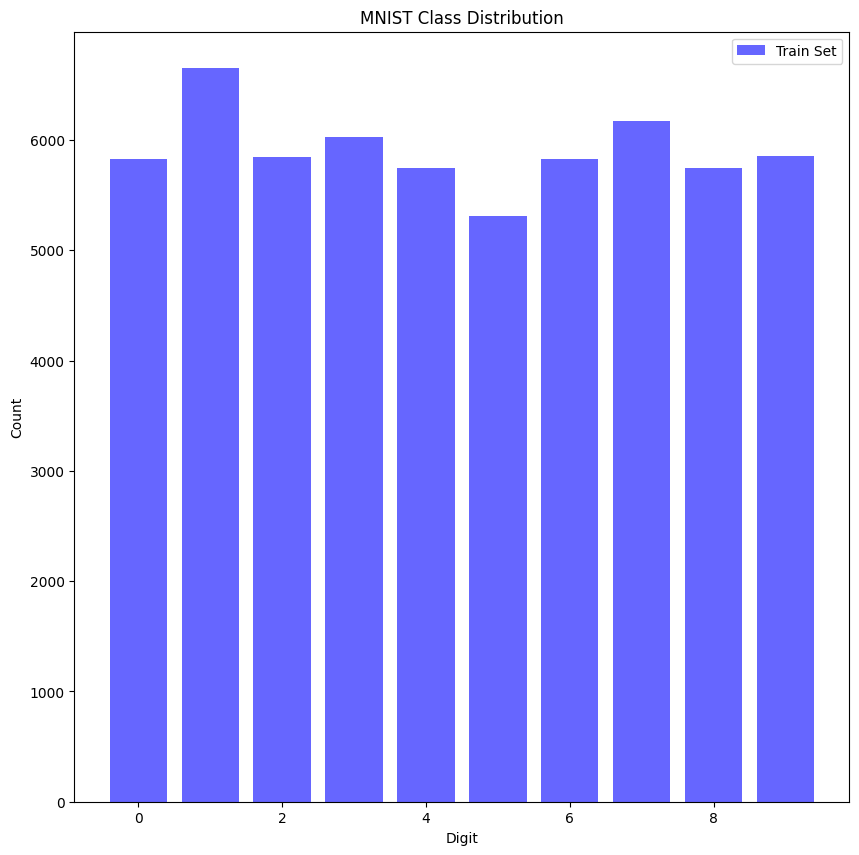

Training set class counts: [5830 6649 5846 6023 5742 5315 5826 6168 5747 5854]


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Count occurrences of each class
train_counts = np.bincount(y_train)

# Plot class distribution
plt.figure(figsize=(10, 10))
plt.bar(range(10), train_counts, color='blue', alpha=0.6, label='Train Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('MNIST Class Distribution')
plt.legend()
plt.show()

# Print class counts
print("Training set class counts:", train_counts)


# Visualizing a single data as an image

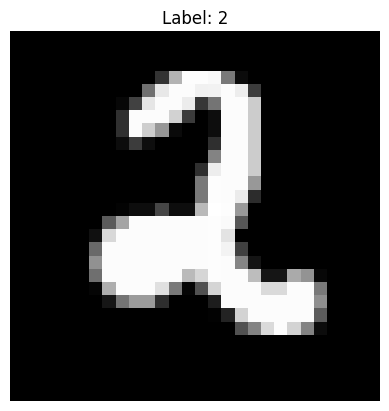

In [9]:
# A sample image
index = 0  # Change this to visualize a different image
image = x_train[:,index]
label = y_train[index]

# Ploting the image
image = image.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()


# Visualizing a single data as its array.

In [10]:
data_train[:,:]

array([[2, 6, 2, ..., 5, 4, 6],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Shape of a single data

In [11]:
x_train[:,0].shape

(784,)

# Function to initialize the parameters which weights and biases for two layers# 

In [12]:
def init_param():
    w1 = np.random.randn(10,784) * 0.1 # maybe I have to decrease this with -0.5
    b1 = np.zeros((10, 1))
    w2 = np.random.randn(10, 10) * 0.1
    b2 = np.zeros((10, 1))
    #X  = x_train # (784, c)
    #Y  = y_train # (1, c)
    #alpha = 0.01
    return w1, b1, w2, b2

# Function for the ReLU activation function --> max(0, x)

In [13]:
def relu(z):
    return np.maximum(z, 0)

# Function for softmax activation function

In [14]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# Forward propagation.

In [15]:
def foward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1 # (10, c)?
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2 # (10, c)
    a2 = softmax(z2)
    return z1, a1, z2, a2

# Backpropagation

In [16]:
def back_prop(w1, b1, w2, b2, z1, a1, z2, a2, X, Y):
  m = Y.size[1]
  dz2 = a2 - Y
  dw2 = 1/m * dz2.dot(a1.T) #(10, 10)
  db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
  dz1 = w2.T.dot(dz2) * (z1 > 0)
  dw1 = 1/m * dz1.dot(X.T) #(10, 784)
  db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
  return dw1, db1, dw2, db2

# Updating the parameters during the gradient decent

In [17]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2

  return w1, b1, w2, b2 #, alpha

# One hot encoding the Y labels

In [18]:
def one_hot_encoding(Y):
  one_hot_Y = np.zeros((Y.size, 10))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

# Function to find the predictions

In [19]:
def predictions(A2):
  return np.argmax(A2, 0) #(10, c)->(1, c)


# Function to calculate the accuracy

In [20]:
def accuracy(predictions, Y):
  #print(predictions, Y)
  return (np.sum(predictions == Y)/Y.size)

# Function for the gradient decent# 

In [21]:
def gradient_decent( x, y, iterations, alpha, decay_rate, w1, b1, w2, b2, r=False):
  if r == False:
    w1, b1, w2, b2 = init_param()
    one_hot_Y = 0
  for i in range(1, iterations+1):
    for j in range(g):
      X = x[:,j:j+1]
      Y = y[j:j+1]
      one_hot_Y = one_hot_encoding(Y)
      z1, a1, z2, a2 = foward_prop(w1, b1, w2, b2, X)
      dw1, db1, dw2, db2 = back_prop(w1, b1, w2, b2, z1, a1, z2, a2, X, one_hot_Y)
      w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
      ''' # Custome learning rate (unsafe)
      if alpha > 0.0001:
        alpha = alpha - decay_rate # best for this 0.0001'''
      '''# time based exponential learning rate
      alpha = initial_alpha / np.exp(-decay_rate * i)'''
      '''# time based standard learning rate
      alpha = initial_alpha / (1 + decay_rate * i)'''
      # Step Decay (got the highes accuracy of 79% with (0.01, 0.001))
      if i+1 % 50 == 0:
        alpha = initial_alpha - 0.005
    if (i%10 == 0):
      print("iteration number: ", i)
      print("I'm the m: ", Y)
      _, _, _, a2 = foward_prop(w1, b1, w2, b2, x_train)
      acc = accuracy(predictions(a2), y_train)
      print("Accuracy", acc)

  return w1, b1, w2, b2

# Initial gradient decent function call.

In [22]:
w1, b1, w2, b2 = gradient_decent(x_train, y_train, 300, 0.01, 0.001, _, _, _, _)

TypeError: 'int' object is not subscriptable

# Testing the prediction of a single data

In [ ]:
x_sample = x_train[:, 5899]
a1=0
a2=0
_, _, z2, a2 = foward_prop(w1, b1, w2, b2, x_sample)
pred = predictions(a2)
print(pred)


In [ ]:
accuracy = (np.sum(pred == y_train))/y_train.size
print(accuracy)

In [ ]:
y_train[100]

In [ ]:
y_train[0:100]

# Run the following cell if the gradient decent function is executed at least once previously

In [ ]:
w1, b1, w2, b2 = gradient_decent(x_train, y_train, 400, 0.01, 0.001, w1, b1, w2, b2, True)

In [ ]:
x_train[:, 1].shape